In [9]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv("parkinson.csv")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
X=df.drop(["name","status"],axis=1)
Y=df.pop("status")

In [5]:
Y.value_counts()

1    147
0     48
Name: status, dtype: int64

In [24]:
df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [11]:
df_group=df.groupby('status')
df.g1=df_group.get_group(1)
g1=df.g1['MDVP:Fhi(Hz)']
g1

C:\Users\91979\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


0      157.302
1      148.650
2      131.111
3      137.871
4      141.781
5      131.162
6      137.244
7      113.840
8      132.068
9      120.103
10     112.240
11     115.871
12     159.866
13     179.139
14     163.305
15     217.455
16     349.259
17     232.181
18     175.829
19     189.398
20     165.738
21     172.860
22     193.221
23     192.735
24     200.841
25     206.002
26     208.313
27     208.701
28     227.383
29     198.346
        ...   
141    253.792
142    219.290
143    231.508
144    241.350
145    263.872
146    191.759
147    216.814
148    216.302
149    565.740
150    211.961
151    224.429
152    233.099
153    139.644
154    128.442
155    127.349
156    142.369
157    134.209
158    154.284
159    138.752
160    124.393
161    135.738
162    126.778
163    131.669
164    142.830
177    190.204
178    158.359
179    155.982
180    163.441
181    161.078
182    163.417
Name: MDVP:Fhi(Hz), Length: 147, dtype: float64

In [12]:
df_group=df.groupby('status')
df.g2=df_group.get_group(0)
g2=df.g2['MDVP:Fhi(Hz)']
g2

C:\Users\91979\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


30     206.896
31     209.512
32     215.203
33     211.604
34     211.526
35     210.565
42     247.326
43     248.834
44     250.912
45     255.034
46     262.090
47     261.487
48     128.611
49     130.049
50     135.069
51     134.231
52     138.052
53     139.867
60     237.494
61     238.987
62     231.345
63     234.619
64     252.221
65     239.541
165    244.663
166    243.709
167    264.919
168    217.627
169    245.135
170    272.210
171    133.374
172    113.597
173    116.443
174    144.466
175    123.109
176    129.038
183    123.925
184    217.552
185    177.291
186    592.030
187    581.289
188    119.167
189    262.707
190    230.978
191    253.017
192    240.005
193    396.961
194    260.277
Name: MDVP:Fhi(Hz), dtype: float64

In [15]:
from scipy import stats

# PERFORMING 2 SAMPLE T TEST TO SEE WHETHER TO INCLUDE MDVP:Fhi(HZ) since it is weakly correlated:

In [17]:
ttest=stats.ttest_ind(g1,g2) 
ttest
#just for example how a t test needs to be perfomed here ttest is not required since shapiro test is failed

Ttest_indResult(statistic=-2.3405672508312887, pvalue=0.02027566914279856)

From above the pvalue is 0.020 then we can reject the hull hypothesis and can proceed. No need to remove MDVP:Fhi(HZ)

In [19]:
#scipy.stats.shapiro
from scipy.stats import shapiro 
# null hypothesis is data is normal.#alternate hypothesis is data not normal. 
#rejecting the null hypothesis since data is not normal.

In [47]:
shapiro(g1) #statistic value = 0.67, p value - 1.66
#p value = 1.66 then failed to reject . it did not pass shapiro then do non parametric test (mannwhitneyu)

(0.6788195371627808, 1.662593458911081e-16)

In [48]:
shapiro(g2) #test statistic - 0.74, p value - 8.22 since p value is higher it failed so perform non parametric test.
#if for example if shapiro test has passed with p value lesser than 0.05 then we would have performed parametric test
#that is 2 sample t test(here status is categorical and MDVP:Fhi(HZ) is numerical so its 2 sample t test)

(0.7427830100059509, 8.228923320530157e-08)

In [ ]:
#even if any 1 group fails amoung shapiro(g1)&shapiro(g2) perform non parametric test

In [49]:
#scipy.stats.mannwhitneyu
from scipy.stats import mannwhitneyu

In [50]:
mannwhitneyu(g1,g2) 
#result --> #Pvalue is less than 0.5 hence we can confidently include MDVP:Fhi(HZ)

MannwhitneyuResult(statistic=2294.0, pvalue=0.00013981351194737522)

In [ ]:
#similarly the 2nd weakest after MDVP:Fhi(HZ) is NHR with value of 0.189429	so perform shapiro if it passes shapiro go for 
#2 sample 2 test if it fails shapiro go for Mann whit U (Non parametric test)

In [ ]:
#Tip : check for the weekly correlated model and if that passes it means rest of the columns will also pass(2nd least,3 least) all will pass if last least correlated value passes

In [21]:
X.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [22]:
model=DecisionTreeClassifier(random_state=0)

In [23]:
model2=DecisionTreeClassifier(criterion = 'entropy',max_depth=4,random_state=0)

In [24]:
Rf_model=RandomForestClassifier(n_estimators=57,criterion='entropy',random_state=0)

In [25]:
models=[]
models.append(('DecisionTree',model))
models.append(('DT_Regularized',model2))
models.append(('RandomForest',Rf_model))

In [26]:
models

[('DecisionTree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=0,
              splitter='best')),
 ('DT_Regularized',
  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=0,
              splitter='best')),
 ('RandomForest',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
   

In [27]:
results=[]
names=[]
scoring='recall'
for name,model in models:
    kfold=model_selection.KFold(n_splits=5,random_state=2)
    cv_results=model_selection.cross_val_score(model,X,Y,cv=kfold,scoring='recall')
    results.append(cv_results)
    names.append(name)
    msg="%s: %f(%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1))
    print(msg)

DecisionTree: 0.927606(0.002754)
DT_Regularized: 0.880986(0.010758)
RandomForest: 0.956177(0.002460)


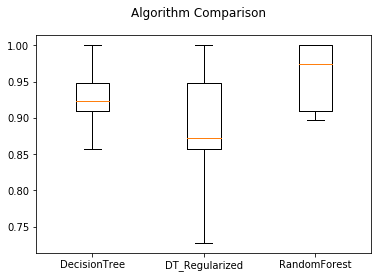

In [28]:
fig=plt.figure()
fig.suptitle("Algorithm Comparison")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [29]:
from sklearn.ensemble import BaggingClassifier

In [30]:
#base estimator: not specified
#by defualt : fully grown decision tree
bag_model=BaggingClassifier(n_estimators=20,random_state=0)
bag_model2=BaggingClassifier(base_estimator=model2,n_estimators=10,random_state=0)

In [31]:
models=[]
models.append(('DecisionTree',model))
models.append(('DT_Regularized',model2))
models.append(('RandomForest',Rf_model))
models.append(('BaggedDT',bag_model))
models.append(('BaggedDT2',bag_model2))

In [32]:
results=[]
names=[]
scoring='recall'
for name,model in models:
    kfold=model_selection.KFold(n_splits=5,random_state=2)
    cv_results=model_selection.cross_val_score(model,X,Y,cv=kfold,scoring='recall')
    results.append(cv_results)
    names.append(name)
    msg="%s: %f(%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1))
    print(msg)

DecisionTree: 0.956177(0.002460)
DT_Regularized: 0.880986(0.010758)
RandomForest: 0.956177(0.002460)
BaggedDT: 0.935664(0.003631)
BaggedDT2: 0.928738(0.003546)
